In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('cleaned_data.csv')
pd.set_option('display.max_columns', 100)
df.head()

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description
0,0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df = df.drop(columns=['Unnamed: 0'])

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,age_rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14 00:00:00,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23 00:00:00,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20 00:00:00,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16 00:00:00,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01 00:00:00,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
def create_plot_df(column_name): 
    plot_df = df[column_name].value_counts().to_frame()
    plot_df = plot_df.reset_index()
    plot_df = plot_df.rename(columns={'index': column_name, column_name: 'Count'})
    return plot_df

type_df = create_plot_df('type')

In [6]:
type_df

,type,Count
0,Movie,5377
1,TV Show,2410


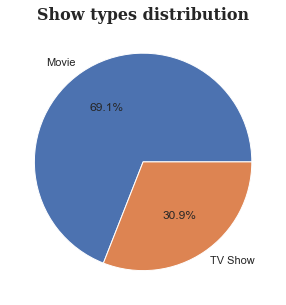

In [25]:
# Visualization of show types distribution

fontdict = {'family': 'serif',
            'weight': 'bold',
            'size': 16 
            }

fontdict_smaller = {'family': 'serif',
                    'weight': 'bold',
                    'size': 12 
                    }            

labels = type_df['type']
sizes = type_df['Count']

plt.figure(figsize=(10,5))
sns.set_theme()
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Show types distribution', fontdict=fontdict)
plt.rcParams['savefig.facecolor'] = 'white'
plt.savefig('Graphs/eda_types_dist.png', dpi = 800)
plt.show()

In [8]:
director_df = create_plot_df('director')

In [9]:
director_df = director_df.iloc[1:, :]
director_df

,director,Count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Youssef Chahine,12
...,...,...
4045,"Pantham Thongsang, Cheewatan Pusitsuksa",1
4046,Georges Hachem,1
4047,Chun Wong,1
4048,Mark A.Z. Dippé,1


In [10]:
director_df = director_df.iloc[:10, :]
director_df

,director,Count
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Youssef Chahine,12
6,Martin Scorsese,12
7,Jay Chapman,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Johnnie To,8


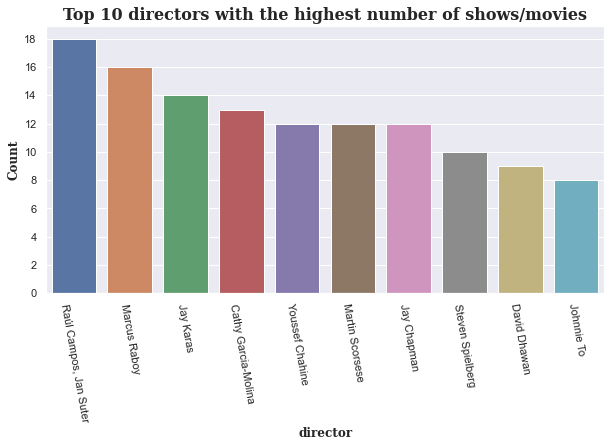

In [12]:
# Visualization of directors with the highest numbers of shows/movies 

def create_bar_plot(data, x, y):
    fontdict_smaller = {'family': 'serif',
                    'weight': 'bold',
                    'size': 12 
                    }

    plt.figure(figsize=(10,7))
    sns_barplot = sns.barplot(data=data, x=x, y=y)
    sns.set_theme()
    plt.xlabel(x, fontdict=fontdict_smaller)
    plt.ylabel(y, fontdict=fontdict_smaller)
    plt.rcParams['savefig.facecolor'] = 'white'
    plt.xticks(rotation=-80)


create_bar_plot(director_df, 'director', 'Count')
plt.title('Top 10 directors with the highest number of shows/movies', fontdict=fontdict)
plt.subplots_adjust(bottom=0.35)
plt.yticks(np.arange(0, 19, 2))
plt.savefig('Graphs/eda_directors.png', dpi = 800)
plt.show()

In [13]:
country_df = create_plot_df('country')
country_df = country_df.drop([2])
country_df = country_df.iloc[:10, :]
country_df

,country,Count
0,United States,2555
1,India,923
3,United Kingdom,397
4,Japan,226
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101
10,Turkey,100


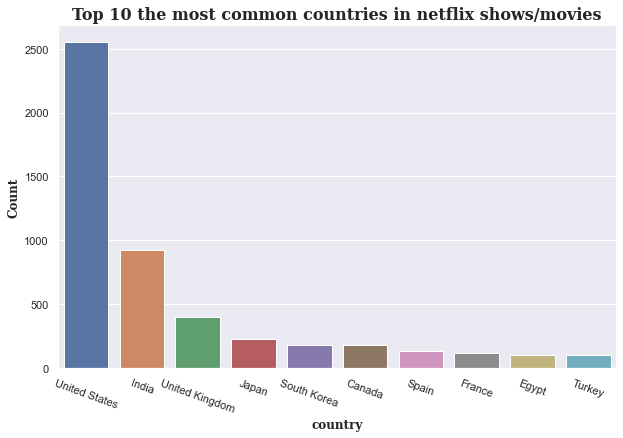

In [14]:
# Visualizaiton of top 10 the most common countries

create_bar_plot(country_df, 'country', 'Count')
plt.title('Top 10 the most common countries in netflix shows/movies', fontdict=fontdict)
plt.xticks(rotation = -20)
plt.subplots_adjust(bottom=0.2)
plt.savefig('Graphs/eda_top_countries.png', dpi = 800)
plt.show()

In [15]:
year_df = create_plot_df('release_year')
year_df

,release_year,Count
0,2018,1121
1,2017,1012
2,2019,996
3,2016,882
4,2020,868
...,...,...
68,1959,1
69,1966,1
70,1925,1
71,1964,1


In [17]:
year_df = year_df.sort_values('release_year', ascending=True)
year_df

,release_year,Count
70,1925,1
64,1942,2
57,1943,3
55,1944,3
56,1945,3
...,...,...
1,2017,1012
0,2018,1121
2,2019,996
4,2020,868


In [22]:
year_df = year_df.drop([22])
year_df

,release_year,Count
70,1925,1
64,1942,2
57,1943,3
55,1944,3
56,1945,3
...,...,...
3,2016,882
1,2017,1012
0,2018,1121
2,2019,996


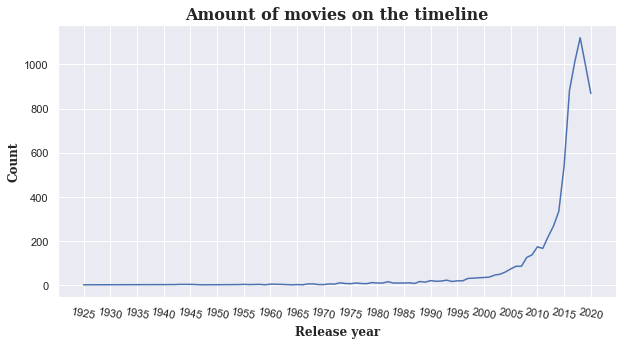

In [28]:
# Visualization of number of movies among the years

plt.figure(figsize=(10, 5))
sns_year_plot = sns.lineplot(data=year_df, x='release_year', y='Count')
sns.set_theme()
plt.title('Amount of movies on the timeline', fontdict=fontdict)
plt.xlabel('Release year', fontdict=fontdict_smaller)
plt.ylabel('Count', fontdict=fontdict_smaller)
plt.yticks(np.arange(0, 1200, 200))
plt.xticks(np.arange(1925, 2021, 5), rotation=-10)
plt.savefig('Graphs/eda_release_year.png', dpi = 800)
plt.show()

In [30]:
df.duration.unique()

array(['4 Seasons', '93 min', '78 min', '80 min', '123 min', '1 Season',
       '95 min', '119 min', '118 min', '143 min', '103 min', '89 min',
       '91 min', '149 min', '144 min', '124 min', '87 min', '110 min',
       '128 min', '117 min', '100 min', '2 Seasons', '84 min', '99 min',
       '90 min', '102 min', '104 min', '105 min', '56 min', '125 min',
       '81 min', '97 min', '106 min', '107 min', '109 min', '44 min',
       '75 min', '101 min', '3 Seasons', '37 min', '113 min', '114 min',
       '130 min', '94 min', '140 min', '135 min', '82 min', '70 min',
       '121 min', '92 min', '164 min', '53 min', '83 min', '116 min',
       '86 min', '120 min', '96 min', '126 min', '129 min', '77 min',
       '137 min', '148 min', '28 min', '122 min', '176 min', '85 min',
       '22 min', '68 min', '111 min', '29 min', '142 min', '168 min',
       '21 min', '59 min', '20 min', '98 min', '108 min', '76 min',
       '26 min', '156 min', '30 min', '57 min', '150 min', '133 min',
       '1

In [39]:
shows_durations = df[['type', 'duration']]
shows_durations = shows_durations[shows_durations.type == 'TV Show']
shows_durations

,type,duration
0,TV Show,4 Seasons
5,TV Show,1 Season
11,TV Show,1 Season
12,TV Show,1 Season
16,TV Show,1 Season
...,...,...
7767,TV Show,1 Season
7775,TV Show,1 Season
7777,TV Show,2 Seasons
7779,TV Show,1 Season


In [40]:
shows_durations = shows_durations['duration'].value_counts().to_frame()
shows_durations = shows_durations.reset_index()
shows_durations

,index,duration
0,1 Season,1608
1,2 Seasons,382
2,3 Seasons,184
3,4 Seasons,87
4,5 Seasons,58
5,6 Seasons,30
6,7 Seasons,19
7,8 Seasons,18
8,9 Seasons,8
9,10 Seasons,6


In [41]:
shows_durations.iloc[0, 0][:2]

'1 '

In [46]:
x = '42 min'
y = x.split(' ')[0]
print(y)

42


In [42]:
shows_durations = shows_durations.rename(columns={'index': 'duration', 'duration': 'Count'})
shows_durations['duration'] = shows_durations['duration'].apply(lambda x: x[:2].strip())
shows_durations

,duration,Count
0,1,1608
1,2,382
2,3,184
3,4,87
4,5,58
5,6,30
6,7,19
7,8,18
8,9,8
9,10,6


In [50]:
movies_durations = df[['type', 'duration']]
movies_durations = movies_durations[movies_durations.type == 'Movie']
movies_durations = movies_durations['duration'].value_counts().to_frame()
movies_durations = movies_durations.reset_index()
movies_durations = movies_durations.rename(columns={'index' : 'duration', 'duration': 'Count'})
movies_durations['duration'] = movies_durations['duration'].apply(lambda x: x.split(' ')[0])
movies_durations

,duration,Count
0,90,136
1,93,131
2,91,125
3,94,125
4,95,119
...,...,...
196,18,1
197,10,1
198,16,1
199,237,1


In [51]:
movies_durations['duration'] = movies_durations['duration'].astype(int)
movies_durations = movies_durations.sort_values('duration', ascending=True)

In [52]:
movies_durations

,duration,Count
173,3,1
177,5,1
168,8,1
169,9,1
197,10,1
...,...,...
200,230,1
187,233,1
199,237,1
195,253,1


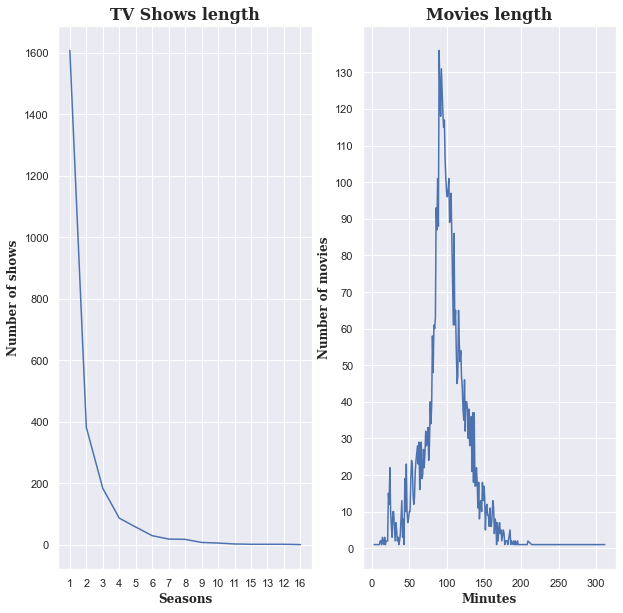

In [62]:
# Visualization of shows and movies length

fig, axs = plt.subplots(ncols=2, figsize=(10,10))
sns.lineplot(data=shows_durations, x='duration', y='Count', ax=axs[0])
sns.lineplot(data=movies_durations, x='duration', y='Count', ax=axs[1])
sns.set_theme()
axs[0].set_title('TV Shows length', fontdict=fontdict)
axs[0].set_xlabel('Seasons', fontdict=fontdict_smaller)
axs[0].set_ylabel('Number of shows', fontdict=fontdict_smaller)
axs[0].set_yticks(np.arange(0, 1650, 200))
axs[1].set_title('Movies length', fontdict=fontdict)
axs[1].set_xlabel('Minutes', fontdict=fontdict_smaller)
axs[1].set_ylabel('Number of movies', fontdict=fontdict_smaller)
axs[1].set_yticks(np.arange(0, 140, 10))
plt.savefig('Graphs/eda_show_durations.png', dpi = 800)
plt.show()

In [70]:
temp = df[['title', 'duration']]
temp = temp.where((temp['duration'] == '16 Seasons') | (temp['duration'] == '312 min') | (temp['duration'] == '253 min'))
temp = temp.dropna()
temp

,title,duration
957,Black Mirror: Bandersnatch,312 min
2538,Grey's Anatomy,16 Seasons
6850,The School of Mischief,253 min


In [71]:
temp = df[['title', 'duration']]
temp = temp[temp['duration'] == '3 min']
temp

,title,duration
5605,Silent,3 min


In [ ]:
'''
    The longest tv show by number of seasons: 'Grey's Anatomy
    The longest movie: 'Black Mirror: Bandersnatch' (but it's an interactive movie, actual length is about ~90 min, so actually the longest movie is 'The School of Mischief')
    The shortest movie: 'Silent'
'''